In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("New_Data/Covid_new.csv")
# df.head()

In [3]:
# df.columns.tolist()

In [4]:
df.rename(lambda col: col.replace('\xa0', ' '), axis='columns', inplace=True)
df.columns.tolist()

['Country,Other',
 'TotalCases',
 'TotalDeaths',
 'TotalRecovered',
 'ActiveCases',
 'Tot Cases/1M pop',
 'Deaths/1M pop',
 'TotalTests',
 'Tests/1M pop',
 'Population',
 'Continent',
 'Active Cases/1M pop']

In [5]:
df.head()

,"Country,Other",TotalCases,TotalDeaths,TotalRecovered,ActiveCases,Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Continent,Active Cases/1M pop
0,Afghanistan,176229,7643.0,158429.0,10157.0,4361.0,189.0,904261,22376.0,40411760,Asia,251.0
1,Albania,272663,3485.0,268359.0,819.0,94923.0,1213.0,1760359,612837.0,2872476,Europe,285.0
2,Algeria,265432,6864.0,178050.0,80518.0,5874.0,152.0,230861,5109.0,45191206,Africa,1782.0
3,Andorra,38794,152.0,37925.0,717.0,500736.0,1962.0,249838,3224798.0,77474,Europe,9255.0
4,Angola,98927,1900.0,96857.0,170.0,2860.0,55.0,1463343,42299.0,34595276,Africa,5.0


## Percentage of each country

In [6]:
df["% Recovered"] = df["TotalRecovered"] / df["TotalCases"] * 100
df["% Deaths"] = df["TotalDeaths"] / df["TotalCases"] * 100
df["% ActiveCases"] = df["ActiveCases"] / df["TotalCases"] * 100

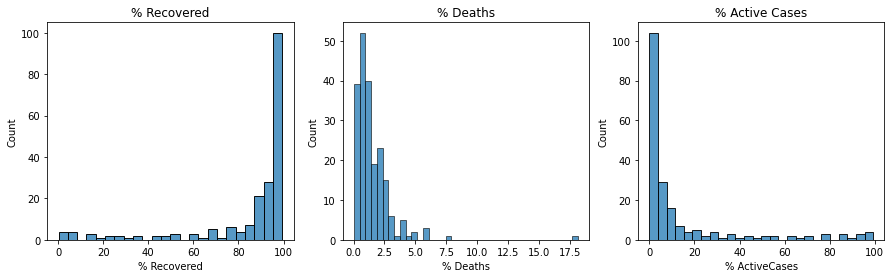

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(15,4))
t = sns.histplot(ax=ax[0], x=df["% Recovered"], data=df).set(title='% Recovered')
t = sns.histplot(ax=ax[1], x=df["% Deaths"], data=df).set(title='% Deaths')
t = sns.histplot(ax=ax[2], x=df["% ActiveCases"], data=df).set(title='% Active Cases')

Nhận thấy cả 3 biểu đồ tỉ lệ người chết, tỉ lệ người hồi phục và tỉ lệ còn đang mắc bệnh đều bị lệch về một phía. Ta đi tìm hiểu xem những nước nào phòng chống dịch hiểu quả

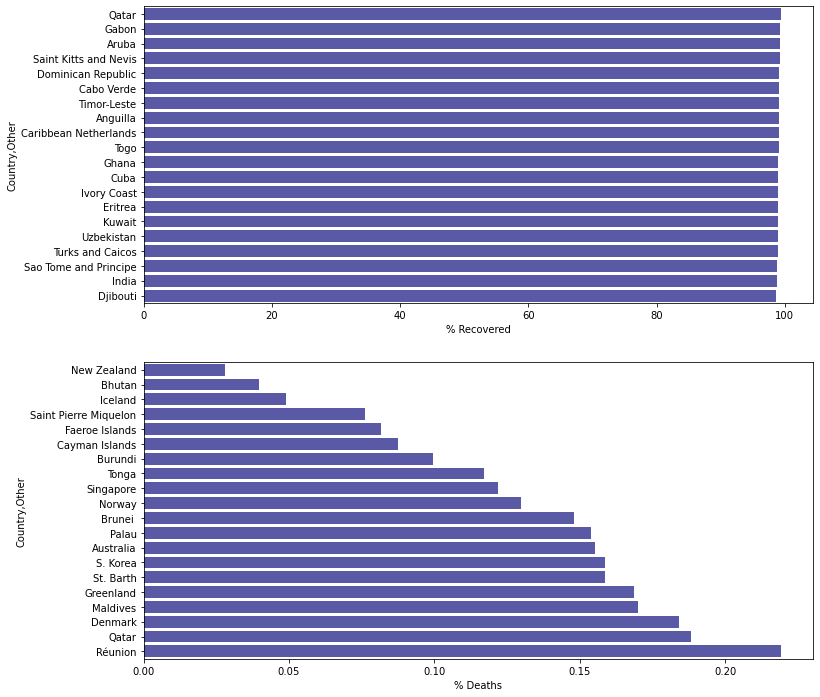

In [8]:
fig, ax = plt.subplots(2, 1, figsize=(12,12))
t = sns.barplot(ax=ax[0], x=df["% Recovered"], y='Country,Other', data=df.nlargest(20, "% Recovered"), color="blue", saturation=0.3)
t = sns.barplot(ax=ax[1], x=df["% Deaths"], y='Country,Other', data=df.nsmallest(20, "% Deaths"), color="blue", saturation=0.3)

- Recover thì chưa biết chém
- Đa số các nước có tỉ lệ người chết thấp là những nước cô lập như New Zealand, Iceland và Saint Pierre Miquelon

Text(0.5, 1.0, 'Most % deaths by continent')

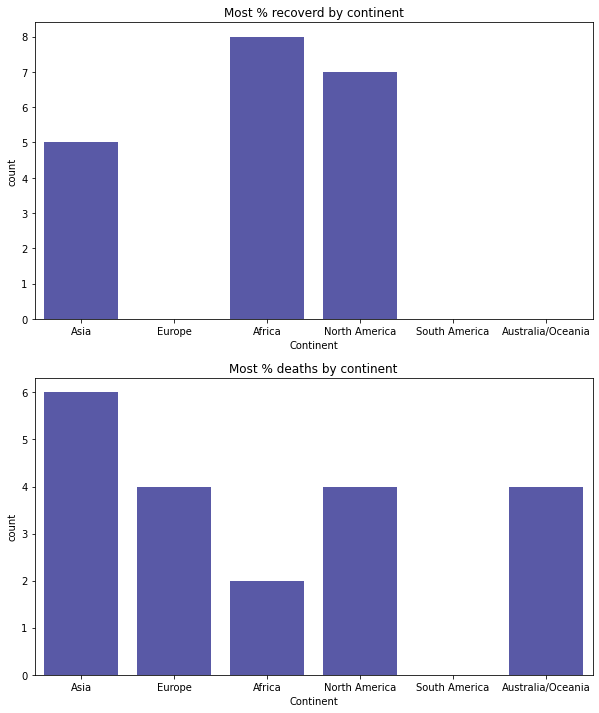

In [9]:
fig, ax = plt.subplots(2, 1, figsize=(10,12))
t = sns.countplot(ax=ax[0], x='Continent', data=df.nlargest(20, "% Recovered"), order = df["Continent"].unique(), color="blue", saturation=0.3)
t.set_title("Most % recoverd by continent")
t = sns.countplot(ax=ax[1], x="Continent", data=df.nsmallest(20, "% Deaths"), order = df["Continent"].unique(), color="blue", saturation=0.3)
t.set_title("Most % deaths by continent")

# Recoverd
- Nhận thấy châu Âu không có nước nào lọt top 20 có lẽ vì biến thể Omicron xuất hiện và người dân ra đường để biểu tình phản đối cuộc chiến giữa Nga và Ukraine
- Ở Nam mỹ cũng không có nước nào lọt top 20 cũng vì sự xuất hiện của biến thể Omicron và gần đây Brazil cũng đang gỡ bõ việc bắt buộc phải đeo khẩu trang
- Châu úc cùng lý do tương tự với sự xuất hiện của biến thể Omicron
- Châu phi có số nước cao nhất bởi vì qua những đợt dịch trước họ đã tạo ra được kháng thể, cộng với việc tiêm vắc xin https://theconversation.com/new-covid-data-south-africa-has-arrived-at-the-recovery-stage-of-the-pandemic-177933
# Deaths
- Nam mỹ không có nước nào có tỉ lệ chết lọt top 20 cho thấy biến thể Omicron bùng phát nặng nề